<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220309_Process_Mining2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f

In [2]:
!pip install pm4py
from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer

     |████████████████████████████████| 1.8 MB 4.0 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23597 sha256=765552b1d2e905e7b552d7cc42f94185330550fb89a60dba0cbf66d8940f0252
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


Preparing the Data

In [28]:
import requests
from io import StringIO
import pandas as pd
import numpy as np

url = "https://gitlab.com/healthcare2/process-mining-tutorial/-/raw/master/ArtificialPatientTreatment.csv"
# Reading URL, decoding and converting it to pandas dataframe using read_csv
eventlog = pd.read_csv(StringIO(requests.get(url).text), on_bad_lines='skip')
# Printing the first 5 rows of the dataframe
eventlog.head()

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [4]:
eventlog.rename(columns={' DateTime': 'time:timestamp', 
'patient': 'case:concept:name', ' action': 'concept:name', ' org:resource': 'org:resource'}, inplace=True)
eventlog['time:timestamp']= pd.to_datetime(eventlog['time:timestamp'])
eventlog.head()

,case:concept:name,concept:name,org:resource,time:timestamp
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [6]:
eventlog.columns

Index(['case:concept:name', 'concept:name', 'org:resource', 'time:timestamp'], dtype='object')

In [7]:
## Convert to log format 
log = log_converter.apply(eventlog)

Process Discovery with Alpha Miner

In [8]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  after removing the cwd from sys.path.


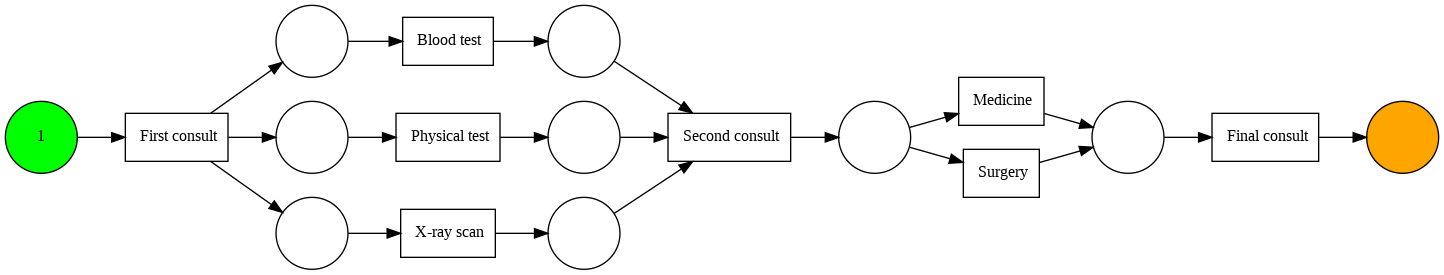

In [9]:
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

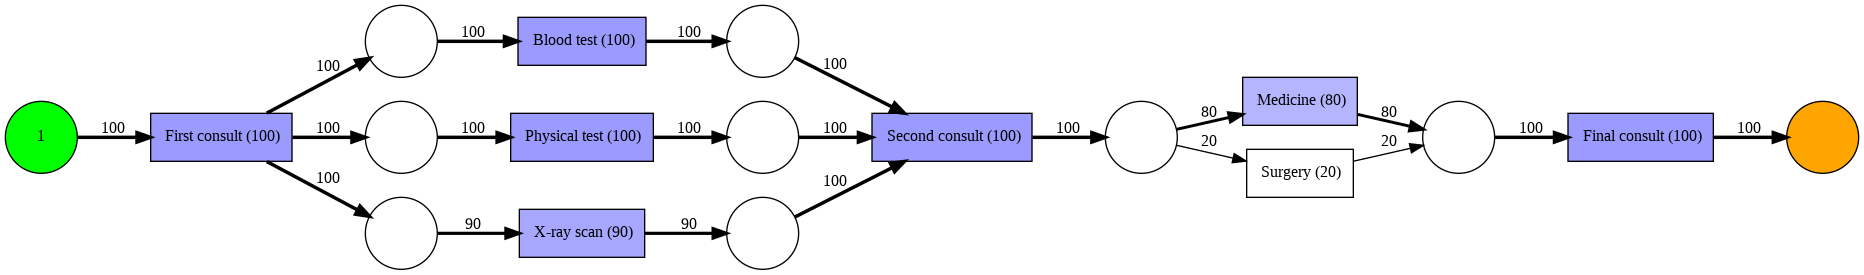

In [10]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

Use the Heuristic Miner

In [11]:
## Import heuristics miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

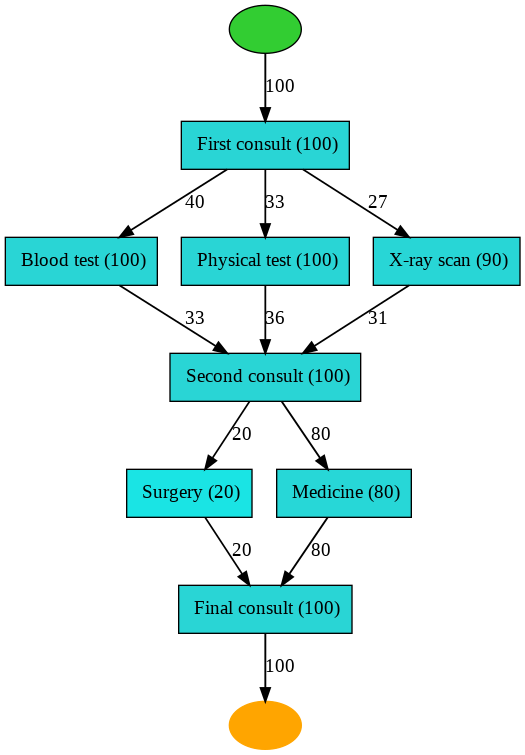

In [12]:
# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

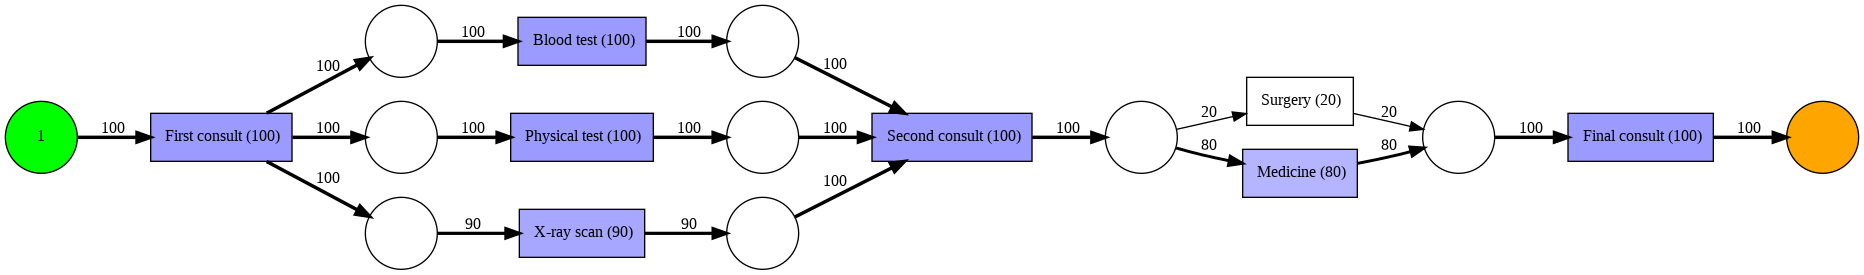

In [13]:
# heuristics miner algorithm returning model, initial marking and
# final marking
net, im, fm = heuristics_miner.apply(log)
# Petri net visualisation
gviz = pn_visualizer.apply(net, im,fm, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

Using the Inductive Miner (Discovery in a Tree Form)

In [14]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# Discover process tree using inductive miner
tree = inductive_miner.apply_tree(log)

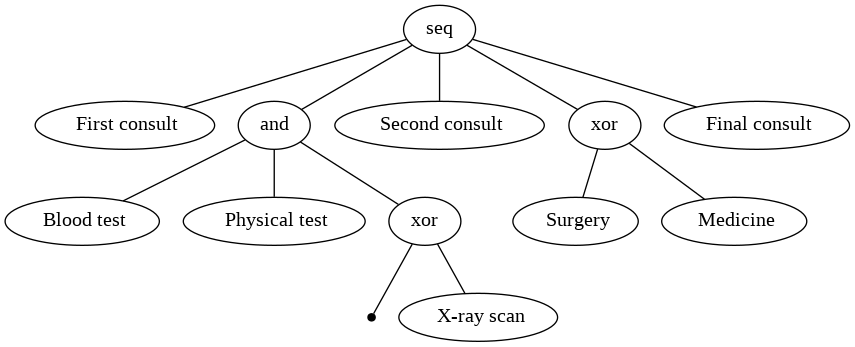

In [15]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer
# Visualise the tree
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  after removing the cwd from sys.path.


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

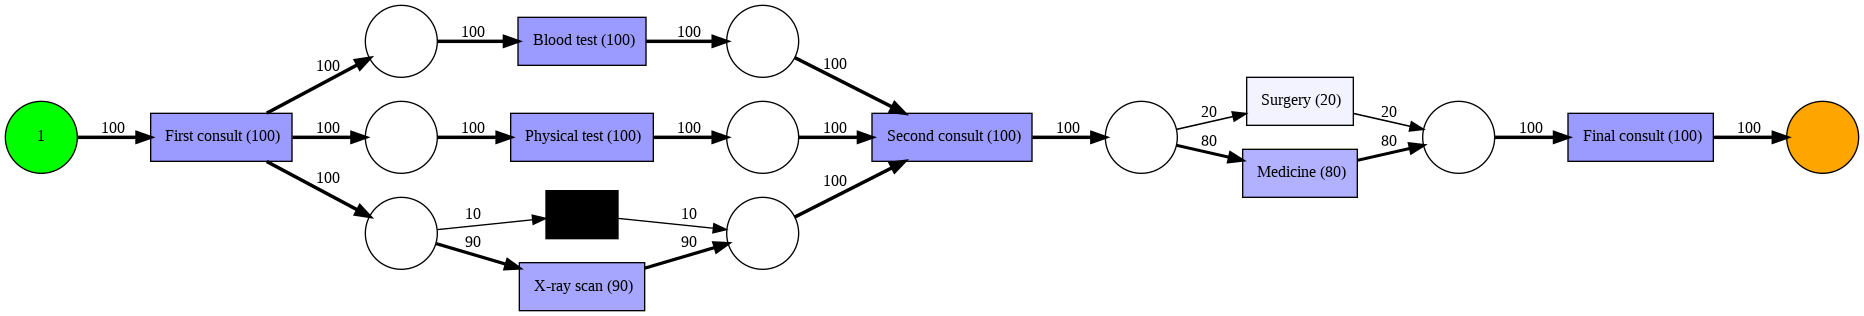

In [16]:
## Either discover the petri net using inductive miner
net, initial_marking, final_marking = inductive_miner.apply(log)
## Then visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

Comparing Models with the directly-follows grapoh (DFG)

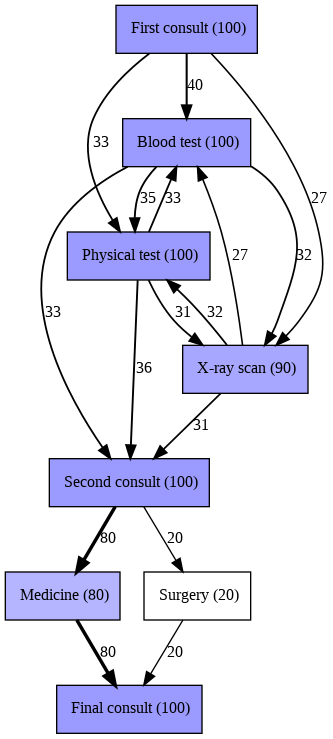

In [17]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

Analysis applied to Healthcare

In [23]:
from pm4py.objects.petri import performance_map
traces = performance_map.get_transition_performance_with_token_replay(log, net, initial_marking, final_marking)

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

In [24]:
print(traces)

{"(3fb59cfe-5e5b-49b7-93e3-c769233ca28c, ' First consult')": {'all_values': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'case_association': {0: [0.0], 95: [0.0], 1: [0.0], 10: [0.0], 16: [0.0], 45: [0.0], 46: [0.0], 67: [0.0], 73: [0.0], 74: [0.0], 85: [0.0], 90: [0.0], 2: [0.0], 7: [0.0], 17: [0.0], 49: [0.0], 56: [0.0], 65: [0.0], 68: [0.0], 86: [0.0], 88: [0.0], 92: [0.0], 93: [0.0], 3: [0.0], 12: [0.0], 14: [0.0], 19: [0.0], 38: [0.0], 39: [0.0], 43: [0.0], 50: [0.0], 54: [0.0], 57: [0.0], 60: [0.0], 72: [0.0], 76: [0.0], 77: [0.0],

In [26]:
traces.keys()

dict_keys(["(3fb59cfe-5e5b-49b7-93e3-c769233ca28c, ' First consult')", "(da35a19c-549a-455e-b19e-a29db911a1ef, ' Physical test')", "(3db9a5a2-71f7-465d-baa4-06e999ff68bb, ' Blood test')", "(ed7df4bb-7a9f-47f6-a49c-53bae56f1421, ' X-ray scan')", "(dec8cebf-1039-4b19-beca-b507967b8609, ' Second consult')", "(231e4c29-dd32-4e8f-8cc0-a5024335709a, ' Surgery')", "(fa9a575a-44d5-423a-a968-91ae38f9ed9c, ' Medicine')", "(bcfce644-4796-4f1b-bd28-85042ca5936e, ' Final consult')"])


In [29]:
## Get all the times to surgery
surgery_time = traces["(231e4c29-dd32-4e8f-8cc0-a5024335709a, ' Surgery')"]['all_values']
seconds_to_days = 60*60*24
seconds_to_hours = 60*60
## Calculate the summary statistics (given in seconds)
mean_time_to_surgery_seconds = np.mean(surgery_time)
max_time_to_surgery_seconds = np.max(surgery_time)
min_time_to_surgery_seconds = np.min(surgery_time)
## Converted to days
mean_time_to_surgery_days = np.mean(surgery_time)/seconds_to_days
max_time_to_surgery_days = np.max(surgery_time)/seconds_to_days
min_time_to_surgery_days = np.min(surgery_time)/seconds_to_days
## Or to hours:
mean_time_to_surgery_hours = np.mean(surgery_time)/seconds_to_hours
max_time_to_surgery_hours = np.max(surgery_time)/seconds_to_hours
min_time_to_surgery_hours = np.min(surgery_time)/seconds_to_hours

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


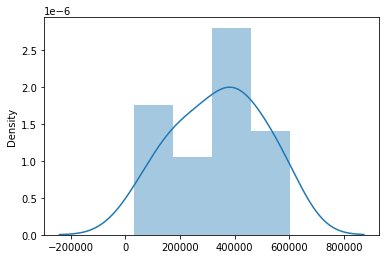

In [ ]:
sns.distplot(surgery_time)

In [30]:
eventlog.columns

Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')

In [32]:
pd.crosstab(eventlog['patient'], eventlog[' org:resource'])

org:resource,Dr. Alex,Dr. Anna,Dr. Ben,Dr. Bob,Dr. Charlie,Dr. Quinn,Dr. Rudy,Lab,Nurse Corey,Nurse Jesse,Pharmacy,Team 1,Team 2
patient,,,,,,,,,,,,,
patient 0,0,2,1,0,1,0,0,1,0,1,0,0,0
patient 1,0,3,0,0,0,0,0,1,0,1,1,1,0
patient 10,0,1,1,1,0,0,0,1,1,0,1,1,0
patient 11,1,2,0,1,0,0,0,1,1,0,0,0,1
patient 12,0,0,1,2,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient 95,0,2,0,1,0,0,1,1,0,1,0,0,0
patient 96,0,1,0,2,0,0,0,1,1,0,1,0,1
patient 97,0,1,0,2,0,0,0,1,1,0,1,1,0


In [33]:
pd.crosstab(eventlog['patient'], eventlog[' org:resource'], normalize='columns')

org:resource,Dr. Alex,Dr. Anna,Dr. Ben,Dr. Bob,Dr. Charlie,Dr. Quinn,Dr. Rudy,Lab,Nurse Corey,Nurse Jesse,Pharmacy,Team 1,Team 2
patient,,,,,,,,,,,,,
patient 0,0.0,0.012658,0.02,0.000000,0.2,0.0,0.000000,0.01,0.000000,0.017544,0.0000,0.000,0.00
patient 1,0.0,0.018987,0.00,0.000000,0.0,0.0,0.000000,0.01,0.000000,0.017544,0.0125,0.025,0.00
patient 10,0.0,0.006329,0.02,0.010870,0.0,0.0,0.000000,0.01,0.023256,0.000000,0.0125,0.025,0.00
patient 11,0.2,0.012658,0.00,0.010870,0.0,0.0,0.000000,0.01,0.023256,0.000000,0.0000,0.000,0.02
patient 12,0.0,0.000000,0.02,0.021739,0.0,0.0,0.000000,0.01,0.000000,0.017544,0.0125,0.000,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient 95,0.0,0.012658,0.00,0.010870,0.0,0.0,0.142857,0.01,0.000000,0.017544,0.0000,0.000,0.00
patient 96,0.0,0.006329,0.00,0.021739,0.0,0.0,0.000000,0.01,0.023256,0.000000,0.0125,0.000,0.02
patient 97,0.0,0.006329,0.00,0.021739,0.0,0.0,0.000000,0.01,0.023256,0.000000,0.0125,0.025,0.00


In [34]:
pd.crosstab(eventlog['patient'], eventlog[' org:resource'], normalize='index')

org:resource,Dr. Alex,Dr. Anna,Dr. Ben,Dr. Bob,Dr. Charlie,Dr. Quinn,Dr. Rudy,Lab,Nurse Corey,Nurse Jesse,Pharmacy,Team 1,Team 2
patient,,,,,,,,,,,,,
patient 0,0.000000,0.333333,0.166667,0.000000,0.166667,0.0,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000
patient 1,0.000000,0.428571,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.142857,0.142857,0.142857,0.000000
patient 10,0.000000,0.142857,0.142857,0.142857,0.000000,0.0,0.000000,0.142857,0.142857,0.000000,0.142857,0.142857,0.000000
patient 11,0.142857,0.285714,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.142857
patient 12,0.000000,0.000000,0.142857,0.285714,0.000000,0.0,0.000000,0.142857,0.000000,0.142857,0.142857,0.000000,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
patient 95,0.000000,0.333333,0.000000,0.166667,0.000000,0.0,0.166667,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000
patient 96,0.000000,0.142857,0.000000,0.285714,0.000000,0.0,0.000000,0.142857,0.142857,0.000000,0.142857,0.000000,0.142857
patient 97,0.000000,0.142857,0.000000,0.285714,0.000000,0.0,0.000000,0.142857,0.142857,0.000000,0.142857,0.142857,0.000000


Other Analyses

In [35]:
# Rework
from pm4py.statistics.rework.cases.log import get as rework_cases

dictio = rework_cases.apply(log)
dictio

{'patient 0': {'number_activities': 6, 'rework': 0},
 'patient 1': {'number_activities': 7, 'rework': 0},
 'patient 10': {'number_activities': 7, 'rework': 0},
 'patient 11': {'number_activities': 7, 'rework': 0},
 'patient 12': {'number_activities': 7, 'rework': 0},
 'patient 13': {'number_activities': 7, 'rework': 0},
 'patient 14': {'number_activities': 7, 'rework': 0},
 'patient 15': {'number_activities': 6, 'rework': 0},
 'patient 16': {'number_activities': 7, 'rework': 0},
 'patient 17': {'number_activities': 7, 'rework': 0},
 'patient 18': {'number_activities': 7, 'rework': 0},
 'patient 19': {'number_activities': 7, 'rework': 0},
 'patient 2': {'number_activities': 7, 'rework': 0},
 'patient 20': {'number_activities': 7, 'rework': 0},
 'patient 21': {'number_activities': 7, 'rework': 0},
 'patient 22': {'number_activities': 7, 'rework': 0},
 'patient 23': {'number_activities': 7, 'rework': 0},
 'patient 24': {'number_activities': 7, 'rework': 0},
 'patient 25': {'number_activit

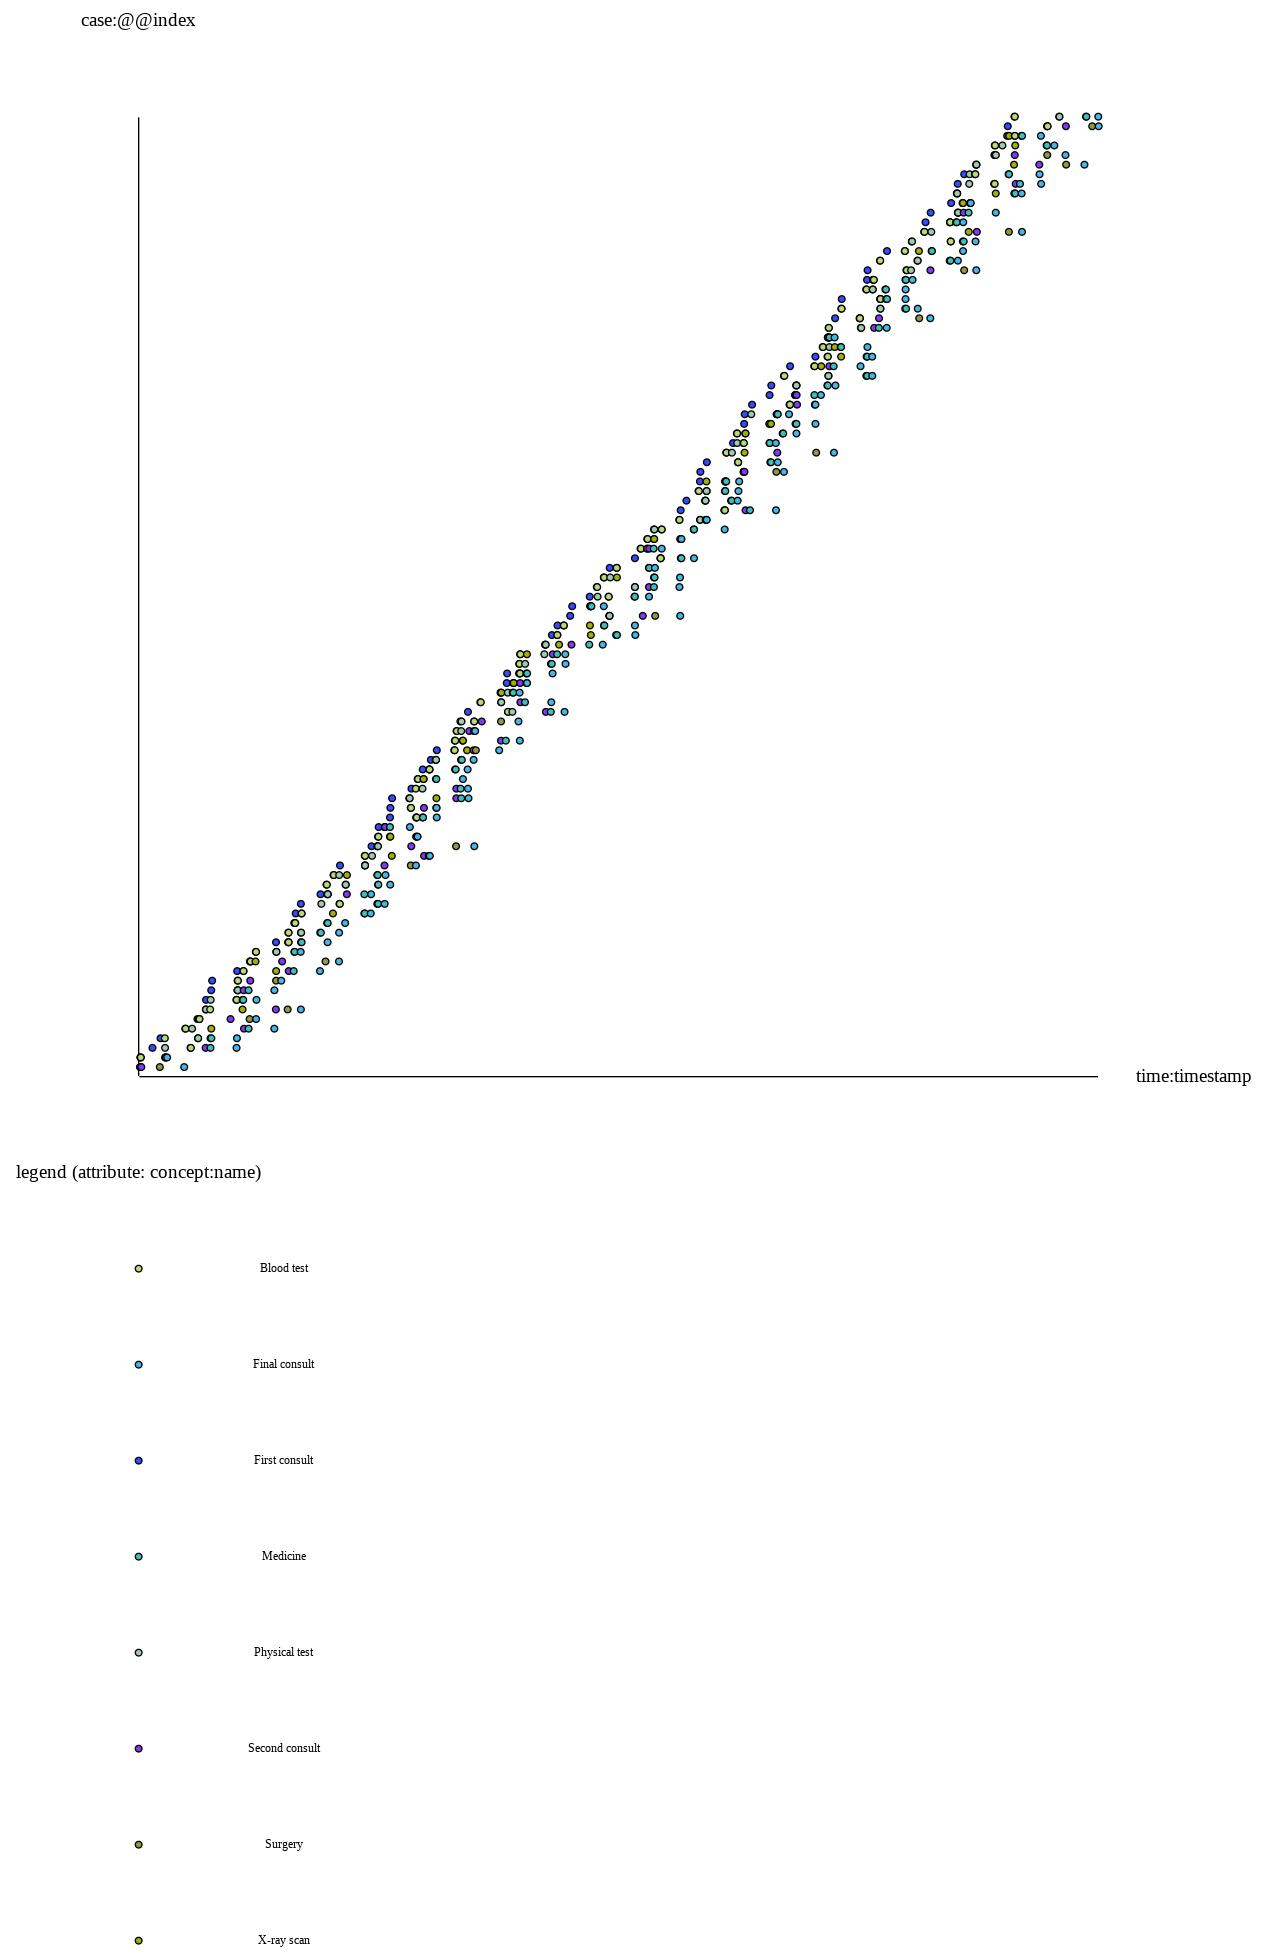

In [36]:
import pm4py
pm4py.view_dotted_chart(log, format="jpeg")

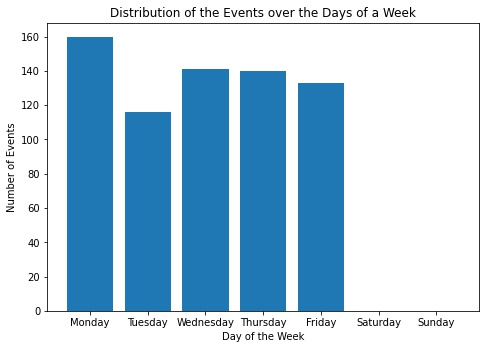

In [37]:
pm4py.view_events_distribution_graph(log, distr_type="days_week", format="jpeg")

In [38]:
# Throughput time
from pm4py.statistics.traces.generic.log import case_statistics
all_case_durations = case_statistics.get_all_casedurations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})
all_case_durations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: get_all_casedurations is deprecated as of 2.2.11 and will be removed in 3.0.0. please use get_all_case_durations instead
  after removing the cwd from sys.path.


[92044.0,
 250020.0,
 256478.0,
 263060.0,
 272357.0,
 284831.0,
 359926.0,
 369153.0,
 419066.0,
 424825.0,
 453235.0,
 458801.0,
 506864.0,
 527172.0,
 529747.0,
 531349.0,
 536839.0,
 574218.0,
 575205.0,
 593357.0,
 595345.0,
 601951.0,
 603232.0,
 603319.0,
 606533.0,
 607342.0,
 608684.0,
 611127.0,
 611555.0,
 621457.0,
 622221.0,
 628224.0,
 677531.0,
 679722.0,
 682715.0,
 683701.0,
 688596.0,
 690760.0,
 693634.0,
 698084.0,
 758873.0,
 763378.0,
 775073.0,
 780410.0,
 780415.0,
 788093.0,
 794560.0,
 797009.0,
 799596.0,
 800812.0,
 838455.0,
 848601.0,
 850875.0,
 856484.0,
 857050.0,
 857324.0,
 861503.0,
 871749.0,
 873454.0,
 874761.0,
 874830.0,
 928971.0,
 946219.0,
 949810.0,
 952806.0,
 953274.0,
 954266.0,
 958235.0,
 1008518.0,
 1012042.0,
 1020540.0,
 1022248.0,
 1024701.0,
 1026368.0,
 1026471.0,
 1026792.0,
 1040567.0,
 1047221.0,
 1110755.0,
 1112762.0,
 1121202.0,
 1121449.0,
 1123298.0,
 1125842.0,
 1126172.0,
 1129919.0,
 1187272.0,
 1196574.0,
 1197473.0,
 

In [39]:
median_case_duration = case_statistics.get_median_caseduration(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})
median_case_duration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: get_median_caseduration is deprecated as of 2.2.11 and will be removed in 3.0.0. please use get_median_case_duration instead
  


838455.0

In [40]:
# Case arrival and dispersion ratio
from pm4py.statistics.traces.generic.log import case_arrival
case_arrival_ratio = case_arrival.get_case_arrival_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
case_dispersion_ratio = case_arrival.get_case_dispersion_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})
case_dispersion_ratio

126452.64646464646

In [41]:
from pm4py.statistics.eventually_follows.log import get as efg_get

efg_graph = efg_get.apply(log)
print(efg_graph)

{(' First consult', ' Blood test'): 100, (' First consult', ' Physical test'): 100, (' First consult', ' Second consult'): 100, (' First consult', ' Surgery'): 20, (' First consult', ' Final consult'): 100, (' Blood test', ' Physical test'): 53, (' Blood test', ' Second consult'): 100, (' Blood test', ' Surgery'): 20, (' Blood test', ' Final consult'): 100, (' Physical test', ' Second consult'): 100, (' Physical test', ' Surgery'): 20, (' Physical test', ' Final consult'): 100, (' Second consult', ' Surgery'): 20, (' Second consult', ' Final consult'): 100, (' Surgery', ' Final consult'): 20, (' First consult', ' X-ray scan'): 90, (' First consult', ' Medicine'): 80, (' Physical test', ' Blood test'): 47, (' Physical test', ' X-ray scan'): 45, (' Physical test', ' Medicine'): 80, (' Blood test', ' X-ray scan'): 49, (' Blood test', ' Medicine'): 80, (' X-ray scan', ' Second consult'): 90, (' X-ray scan', ' Medicine'): 74, (' X-ray scan', ' Final consult'): 90, (' Second consult', ' Medi

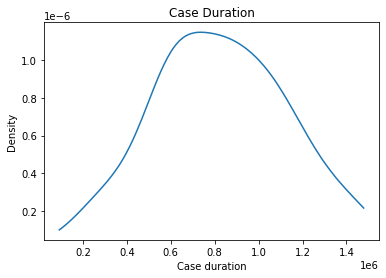

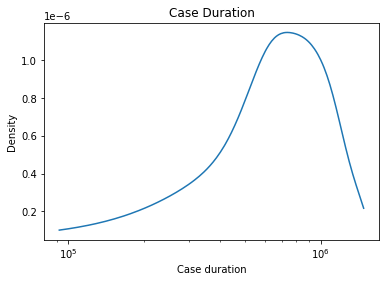

In [42]:
from pm4py.util import constants
from pm4py.statistics.traces.generic.log import case_statistics
x, y = case_statistics.get_kde_caseduration(log, parameters={constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

gviz = graphs_visualizer.apply_semilogx(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

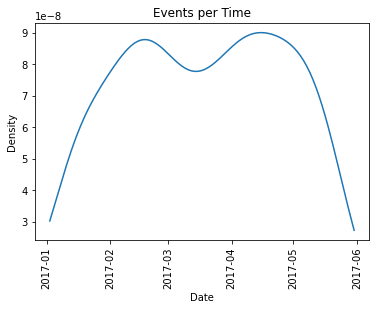

In [43]:
from pm4py.algo.filtering.log.attributes import attributes_filter
x, y = attributes_filter.get_kde_date_attribute(log, attribute="time:timestamp")

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

ValueError: ignored